# Quantitative Finance with Python
# NOTEBOOK 3
## Alan Moreira, University of Rochester Simon Graduate School of Business

## Objectives

 
 1. Return distributions and moments of a return distribution
 2. Annualization of returns
 3. Excess returns and risk premiums
 4. Portfolio Mathematics



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#GlobalFinMonthly
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
Data = pd.read_csv(url,na_values=-99)
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])

Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 647 entries, 1963-02-28 to 2016-12-31
Data columns (total 6 columns):
RF                  647 non-null float64
MKT                 647 non-null float64
USA30yearGovBond    647 non-null float64
EmergingMarkets     647 non-null float64
WorldxUSA           647 non-null float64
WorldxUSAGovBond    647 non-null float64
dtypes: float64(6)
memory usage: 35.4 KB


In [6]:
from scipy import stats
np.random.seed(12345678)
x = np.random.random(10)
y = np.random.random(10)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
p_value

0.42723942646840252

# 1. Distribution of Returns

Lets start by looking at the moments of the distribution of returns for the market portfolio

- does anyone know what is the U.S. market portfolio?

In [7]:
# looking at it's mean
Data['MKT'].mean()

# what does it mean?

0.009051777434312205

In [8]:
# looking at the market standard deviation

Data['MKT'].std()

# what does it mean?

0.044003148906741896

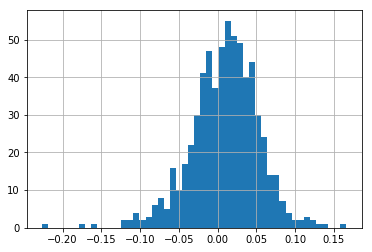

In [9]:
# to have a sense of what that means lets look at the histgram of the distribution of retruns

Data.MKT.hist(bins=50)

# what do we see?

# # centered around the mean, the amount of variation around the center is captured by the standard deviation

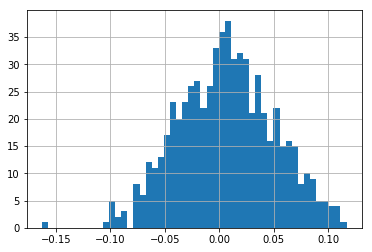

In [4]:
# lets look at a simulation to see this more clearly
mu=Data.MKT.mean()
std=Data.MKT.std()
T=Data.MKT.count()
X=pd.Series(np.random.normal(mu,std,T))

X.hist(bins=50)

# what happens if we increase the mean?

# what happens if we increase the standard deviation?

# for the same standard mean and standard deviation what do you notice when you compare the real data and the simulated data?



In [11]:
# To evaluate how close a distribution is to the normal distribution we typically look at

# skewness

[Data.MKT.skew(), X.skew()]


[-0.5053783766354294, -0.028506639414473532]

In [12]:
# To evaluate how close a distribution is to the normal distribution we typically look at

# kurtosis
[Data.MKT.kurtosis(),X.kurtosis()]


[1.9881305187934846, 0.07320421452581316]

In [13]:
# look at also at log returns

# if innovations in log returns are iid then, log returns at long enough horizons must be normal 

print([np.log(1+Data.MKT).skew(),X.skew()])

print([np.log(1+Data.MKT).kurtosis(),X.kurtosis()])

[-0.7707864524331097, -0.028506639414473532]
[2.859221702344219, 0.07320421452581316]


LECTURE 3 stopped here

number of return relaizations 3 standard deviations below/higher the mean

$$PROB(|R-E{R}|>3\sigma(R))$$


In [14]:

MKTlog=np.log(1+Data.MKT)
A=((MKTlog-MKTlog.mean())<-2*MKTlog.std())

B=((X-X.mean())<-2*X.std())

[A.sum()/A.count(),B.sum()/A.count()]



[0.03400309119010819, 0.01854714064914992]

In [15]:
A=((MKTlog-MKTlog.mean())>3*MKTlog.std())

B=((X-X.mean())>3*X.std())

[A.sum(),B.sum()]

[1, 1]

Why we care about deviations from normality?


We can also do the computation precisely  without using a simulation which is the way we will typically do.

For that we will import the normal density function using the SCIPY library


SCIPY
 - This is a stats package
 - It has a lot of stuff in it
 - I will talk about only the stuff we need 
 - But feel free to have fun

https://docs.scipy.org/doc/scipy/reference/

https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

In [9]:
# Step 2

# Here I am only importing the normal distribution

from scipy.stats import norm

# and I am creating this p object which is the standard normal distribution
p=norm(Data.MKT.mean(),Data.MKT.std())

In [10]:
p

Here what that looks like

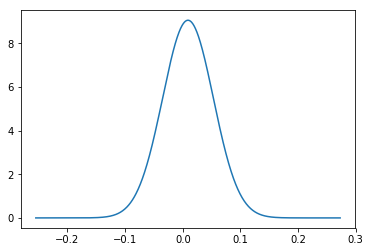

In [11]:
mu,sigma=Data.MKT.mean(),Data.MKT.std()
grid=np.linspace(mu-6*sigma,mu+6*sigma,1000)
plt.plot(grid, p.pdf(grid))

In [15]:
# However it is often more covenient to work with the standard normal distribution
ps=norm(0,1)
threshold=2
probm=ps.cdf(-threshold)
probp=1-ps.cdf(threshold)
print([probm*Data.MKT.count(),probp*Data.MKT.count()])
[probm,probp]

[14.719335370471939, 14.719335370471947]


[0.022750131948179195, 0.02275013194817921]

In [17]:
# we often will use the opposite operation.

# given a probability , lets say 5% we want to know the value X for which there is less than 5% probability 
#that the standard normal produces a value higher than X

# this function is the inverse cdf which we call using .isf


ps.isf(0.025)

1.9599639845400545

In [20]:
# we use this in t-tests for example
 

# 2. Annualization of returns

In [18]:
# convention to talk in terms of annual numbers

# dirty annualization from monthly returns

# simply multiply by number of months in a year
Data.MKT.mean()*12



0.10862132921174646

In [19]:
# for standard deviation you multiply by the square root of number of periods since the varaince grows with T

Data.MKT.std()*12**0.5

0.15243137919899172

In computation above we cut corners:


- ignore compouding

- assumed returns are i.i.d 
 
- If you want to compare assets returns across multiple horizon, 
- lets say that you only have one asset at the yearly frequency, 
- than you have to aggregate the monthly data set to yearly and the compute the moments
- This makes no assumptiuons and it is always right
- for that we will have to learn some new pandas functionality that is very useful to construct different trading signals



# Application of SQL methods in Pandas


## SQL: Structured Query Language. SQL is used to communicate with a database


- very useful in investing 

here is the documentation

http://pandas.pydata.org/pandas-docs/stable/groupby.html

- For every year we want to compute the cumulative returns

$$r_{year}=\prod_{t \in year} (1+r_t)-1$$

In the end we want a table that looks like

year|MKT...
--|-
1997|$r_{1997}$
1998|$r_{1998}$
1999|$r_{1999}$

In [27]:
# First we will construct a year variable which we will use to group the observations together
Data['year']=Data.index.year
print(Data.head(3))


                RF     MKT  USA30yearGovBond  EmergingMarkets  WorldxUSA  \
Date                                                                       
1963-02-28  0.0023 -0.0215         -0.001878         0.098222  -0.002773   
1963-03-31  0.0023  0.0331          0.003342         0.014149   0.000371   
1963-04-30  0.0025  0.0476         -0.001843        -0.147055  -0.003336   

            WorldxUSAGovBond  year  month  
Date                                       
1963-02-28          0.003206  1963      2  
1963-03-31          0.001913  1963      3  
1963-04-30          0.008002  1963      4  


In [30]:
#Here we are at the same time adding 1 to the return variable, so we have a gross return which we can compound
#And also create the new data set with year as a grouping variable
DataT=Data.copy()
DataT=DataT+1
DataT['year']=DataT.index.year
Datagrouped=(DataT).groupby('year')
# the last step is how we want to group
# we could want to keep the standard devition, the mean, the man, the min, or even to apply some custom fucntion
# in our case all we need is the product
Datayear=(Datagrouped).prod()-1
# where we are substracting 1 to get back to a net return
[Datayear.EmergingMarkets.mean(),Datayear.EmergingMarkets.std()]

[0.14703663140875137, 0.2726717359779176]

Groupby method is incredibly powerful/flexible tool construct trading signals

Enables you to quickly aggregate variables at different frequencies

# 3. Excess returns and risk-premiums


- it is convenient to decompose the return earned in terms of what you earn due 
 
 1. compensation for waiting (time-value of money)
 2. compensation for bearing risk
 
 
 WE can an excess return, the return, minus the risk-free rate 
 
 $$R_i^e=R_i-R_f$$
 
 We typically use the returns of a 3-month treasury bill
 
So the excess return of the market is

$$R_{MKT}-R_f$$

i.e. how much more I would get if I invested in the market instead of at the risk-free rate

We call the Expected difference, the risk-premium

$$E[R_i^e]=E[R_i-R_f]$$

It is how much more you expect to get by investing in asset i instead of the risk-free rate

When asset i, is the total market portfolio of US equities, we call this, the equity risky premium


Equity Risk premium

$$E[R_{MKT}^e]=E[R_{MKT}-R_f]$$


In [33]:
(Data.MKT-Data.RF).mean()

0.005140340030911903

In [34]:
(Data.MKT-Data.RF).mean()*12

0.06168408037094284

What does this mean?

Lets look at how much money one would have if they had invested 1 dollar in the market and kept reinvesting until the end of our sample

lets then compare with an investment in the risk-free rate

$$(1+r_1)(1+r_2)....(1+r_T)$$

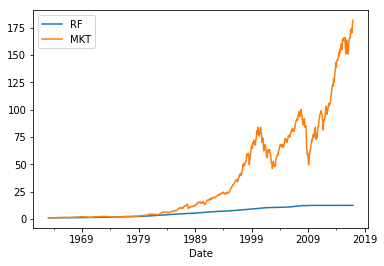

In [35]:
(1+Data[['RF','MKT']]).cumprod().plot()

# 4. Portfolio mathematics 

In [76]:
#GlobalFinMonthly
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
Data = pd.read_csv(url,na_values=-99)
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])


In [39]:
Data.head(5)

,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,,
1963-02-28,0.0023,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139


In [77]:
# lets start by constructing a equal-weigthed portfolio
Wghts=np.ones(5)/5

Wghts

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [41]:
D=Data.loc['9/2008','MKT':]
Wghts[0]*D.MKT+Wghts[1]*D.USA30yearGovBond+Wghts[2]*D.EmergingMarkets\
+Wghts[3]*D.WorldxUSA+Wghts[4]*D.WorldxUSAGovBond


Date
2008-09-30   -0.083522
dtype: float64

In [45]:
D=Data.loc['2008','MKT':]
Wghts[0]*D.MKT+Wghts[1]*D.USA30yearGovBond+Wghts[2]*D.EmergingMarkets\
+Wghts[3]*D.WorldxUSA+Wghts[4]*D.WorldxUSAGovBond


Date
2008-01-31   -0.011955
2008-02-29    0.003336
2008-03-31    0.002149
2008-04-30    0.009911
2008-05-31    0.000219
2008-06-30   -0.017327
2008-07-31   -0.005547
2008-08-31   -0.013889
2008-09-30   -0.035101
2008-10-31   -0.048034
2008-11-30   -0.011202
2008-12-31    0.023814
dtype: float64

In [78]:
D

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,
1963-02-28,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1963-03-31,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0200,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,-0.0177,0.001666,-0.055699,-0.011160,0.003139
1963-07-31,-0.0012,0.003400,0.088591,0.007900,0.001901
1963-08-31,0.0532,0.006861,0.027940,0.035924,0.002715
1963-09-30,-0.0130,0.001657,-0.025040,0.002432,0.004526
1963-10-31,0.0282,-0.005193,0.038818,-0.001617,0.001675


In [83]:
# a better way of doing this is in vector notation
D=Data.loc[:,'MKT':]
D['portfolio']=(D @ Wghts.T)
D.portfolio.mean()*12

0.09682766807666138

In [82]:
D.head()

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,
1963-02-28,-0.0215,-0.001878,0.098222,-0.002773,0.003206
1963-03-31,0.0331,0.003342,0.014149,0.000371,0.001913
1963-04-30,0.0476,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,0.0200,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,-0.0177,0.001666,-0.055699,-0.011160,0.003139


In [85]:
D=D.drop(['MKT','portfolio'],axis=1)

In [86]:
D

,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,
1963-02-28,-0.001878,0.098222,-0.002773,0.003206
1963-03-31,0.003342,0.014149,0.000371,0.001913
1963-04-30,-0.001843,-0.147055,-0.003336,0.008002
1963-05-31,-0.001807,-0.012172,-0.000186,0.004689
1963-06-30,0.001666,-0.055699,-0.011160,0.003139
1963-07-31,0.003400,0.088591,0.007900,0.001901
1963-08-31,0.006861,0.027940,0.035924,0.002715
1963-09-30,0.001657,-0.025040,0.002432,0.004526
1963-10-31,-0.005193,0.038818,-0.001617,0.001675


In [52]:
# we can easily compute the mean returns of a portfolio
(Data.loc[:,'MKT':] @ Wghts).mean()*12

0.09682766807666138

In [53]:
# or like that.

# averages are linear

(Data.loc[:,'MKT':]).mean() @ Wghts*12

0.09682766807666152

In [57]:
(Data.loc[:,'MKT':] @ Wghts).std()*12**0.5

0.09705407967396883

In [58]:
# why they are not the same?
# which one is correct? What is going on?
(Data.loc[:,'MKT':]).std() @ Wghts*12**0.5

0.14227012967080924

In [59]:
Data.loc[:,'MKT':].cov()

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
MKT,0.001936,0.000104,0.001280,0.001255,0.000182
USA30yearGovBond,0.000104,0.001226,-0.000211,-0.000017,0.000264
EmergingMarkets,0.001280,-0.000211,0.003544,0.001651,0.000242
WorldxUSA,0.001255,-0.000017,0.001651,0.002175,0.000419
WorldxUSAGovBond,0.000182,0.000264,0.000242,0.000419,0.000407


In [91]:


(Wghts.T @ Data.loc[:,'MKT':].cov() @ Wghts)**0.5*12**0.5

0.09705407967396883

A simple way of computing betas

The Beta of portfolio A with respect to portfolio B is

$$\beta_{A,B}=\frac{cov(R_A,R_B)}{cov(R_B,R_B)}$$

In [61]:
# Lets compute the beta of the market with respect to our equal weighted portfolio

# contruct time series of our EW portfolio
Rp=Data.loc[:,'MKT':] @ Wghts

# estimate the covariance matrix
C=np.cov(Rp,Data.MKT)

print(C)

[[0.00078496 0.00095141]
 [0.00095141 0.00193628]]


In [64]:
C[1,1]

0.0019362771137089027

In [65]:
# how can be compute beta using the information in the covariance matrix?
Beta=C[1,0]/C[1,1]
Beta

0.49136213019014535

In [66]:
# correlation and the benefits of diversification

D=Data.loc[:,['MKT','WorldxUSA','EmergingMarkets',]]

D.corr()

,MKT,WorldxUSA,EmergingMarkets
MKT,1.000000,0.611369,0.488753
WorldxUSA,0.611369,1.000000,0.594653
EmergingMarkets,0.488753,0.594653,1.000000


## 

In [67]:
D=Data.loc[:,['MKT','WorldxUSA','EmergingMarkets','USA30yearGovBond']]

D.corr()

,MKT,WorldxUSA,EmergingMarkets,USA30yearGovBond
MKT,1.000000,0.611369,0.488753,0.067779
WorldxUSA,0.611369,1.000000,0.594653,-0.010180
EmergingMarkets,0.488753,0.594653,1.000000,-0.101321
USA30yearGovBond,0.067779,-0.010180,-0.101321,1.000000


In [93]:
volUsEm=[]
volUsW=[]
volUsB=[]
volEmB=[]
for x in range(0,11):
    Wghts=np.array([x/10,1-x/10])
    print(Wghts)
    D=Data.loc[:,['MKT','EmergingMarkets']]
    volUsEm.append((Wghts.T @ D.cov() @ Wghts)**0.5)
    
    D=Data.loc[:,['MKT','WorldxUSA']]
    volUsW.append((Wghts.T @ D.cov() @ Wghts)**0.5)
    
    D=Data.loc[:,['MKT','USA30yearGovBond']]

    volUsB.append((Wghts.T @ D.cov() @ Wghts)**0.5)
    
    D=Data.loc[:,['EmergingMarkets','USA30yearGovBond']]

    volEmB.append((Wghts.T @ D.cov() @ Wghts)**0.5)


[0. 1.]
[0.1 0.9]
[0.2 0.8]
[0.3 0.7]
[0.4 0.6]
[0.5 0.5]
[0.6 0.4]
[0.7 0.3]
[0.8 0.2]
[0.9 0.1]
[1. 0.]


In [70]:
volUsEm

[0.0595277065272415,
 0.055857677693791484,
 0.0524880869664782,
 0.04948035158085133,
 0.04690413537030316,
 0.0448338871860759,
 0.043342170788953645,
 0.04248996234748698,
 0.042315917040634796,
 0.04282830340786219]

In [71]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

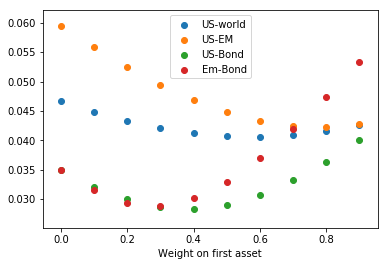

In [69]:
plt.scatter(np.arange(0,10)/10,volUsW)
plt.scatter(np.arange(0,10)/10,volUsEm)
plt.scatter(np.arange(0,10)/10,volUsB)
plt.scatter(np.arange(0,10)/10,volEmB)
plt.legend(['US-world','US-EM','US-Bond','Em-Bond'])
plt.xlabel('Weight on first asset')
plt.show()